## 简答题
1. 精确率是什么，评估分类的性能为什么不能只用精确率

**精确率（Precision）** 是指被预测为正类的样本中有多少是真正的正类，公式为：

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**不能只用精确率的原因**：它不考虑漏判（FN），可能导致模型只预测极少正类来获得很高的精确率，但召回率很低，漏掉大量正样本，因此需要与召回率等指标结合评估模型性能。

---

2. 简述下混淆矩阵是什么

**混淆矩阵**是分类任务中用于评价模型预测结果的一个表格，行表示真实类别，列表示预测类别。
在二分类中包含：

* **TP**（真正例）：预测为正，实际为正
* **FP**（假正例）：预测为正，实际为负
* **FN**（假反例）：预测为负，实际为正
* **TN**（真反例）：预测为负，实际为负

它能直观反映模型的分类正确与错误情况，并据此计算精确率、召回率、准确率等指标。

---

3. 简述下各个性能指标的意思： 准确率，召回率，F1分数，假阳性，PR曲线，ROC曲线，AUC分数

**准确率（Accuracy）**：预测正确的样本数占总样本数的比例。

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

**召回率（Recall）**：实际为正类中被预测为正类的比例，反映查全率。

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**F1分数（F1-score）**：精确率与召回率的调和平均，综合反映查准与查全。

$$
F_1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**假阳性（False Positive, FP）**：预测为正类但实际为负类的样本数。

**PR曲线**：以**召回率**为横轴，**精确率**为纵轴绘制的曲线，反映在不同阈值下查全与查准的变化，适用于类别不平衡场景。

**ROC曲线**：以\*\*假阳性率(FPR)\*\*为横轴，\*\*真正例率(TPR=Recall)\*\*为纵轴绘制的曲线，反映分类器在不同阈值下的整体区分能力。

**AUC分数**：ROC曲线下的面积（Area Under Curve），值越接近1表示模型区分正负类的能力越强。

---

4. 简述下准确率-召回率权衡

**准确率-召回率权衡**指的是：在二分类中，通过调整决策阈值，通常会出现**准确率（Precision）提高时，召回率（Recall）下降；召回率提高时，准确率下降**的现象。

原因是：

* 提高阈值 → 模型更“谨慎”预测正类 → 假阳性减少（Precision↑），但漏掉更多正样本（Recall↓）
* 降低阈值 → 模型更“宽松”预测正类 → 找到更多正样本（Recall↑），但误判的负样本也更多（Precision↓）

因此，在实际应用中需要根据业务需求选择合适的平衡点，例如：

* **查准优先**（Precision高）：垃圾邮件过滤，减少误杀正常邮件
* **查全优先**（Recall高）：疾病筛查，尽量不漏掉病人

---

5. 如何用二元分类器 去解决多元分类的问题

在多分类任务中，如果手头的算法本身只能处理**二分类**，可以用**分解策略**将多分类转化为多个二分类问题，常见方法有 **OVR（One-vs-Rest）** 和 **OVO（One-vs-One）**：


**1. OVR（One-vs-Rest，也叫 One-vs-All）**

* 思路：对每个类别，训练一个二分类器，把该类别的样本当作“正类”，其余所有类别合并为“负类”。
* 如果有 $K$ 个类别，需要训练 **K 个分类器**。
* 预测时，将样本输入所有分类器，取预测概率/得分最高的类别作为结果。
* 优点：模型数量少

**2. OVO（One-vs-One）**

* 思路：对每一对类别，训练一个二分类器，只用这两类样本进行训练。
* 如果有 $K$ 个类别，需要训练 $\frac{K(K-1)}{2}$ 个分类器。
* 预测时，样本会被所有分类器比较一遍，每个分类器投票给一个类别，得票最多的类别为预测结果。
* 优点：适用于不能应用于大数据集的算法，训练时只保留属于某2个类别的数据
* 缺点：分类器多

---

6. 什么是 多标签-多分类问题？

指每个样本同时具有多个标签，且每个标签本身是一个多分类问题。

## 编程题

1. 机器学习面试题：
任务：
使用线性回归、多项式回归和决策树回归预测学生期末成绩，并比较模型性能。数据集采用UCI机器学习库中的"学生表现数据集"。

实现步骤：
1. 将数据加载到Pandas DataFrame
2. 分离特征(X)和目标变量(y)
3. 按80-20划分训练测试集(random_state=42)
4. 使用StandardScaler标准化特征
5. 训练以下模型：
   - 多项式回归(degree=2)
6. 计算各模型的MSE和R2分数
7. 输出评估指标

- 线性回归的 R² 分数

1. 定义
**R² 分数（决定系数, Coefficient of Determination）** 用于衡量回归模型对数据的拟合程度。

公式：
$$
R2 = 1 - \frac{\text{SSR}}{\text{SST}}
$$
其中：
- **SSR**（Sum of Squared Residuals）：残差平方和
  $$
  SSR = \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $$
- **SST**（Total Sum of Squares）：可看成真实值的方差
  $$
  SST = \sum_{i=1}^n (y_i - \bar{y})^2
  $$
- $ y_i $ ：真实值
- $ \hat{y}_i $ ：预测值
- $ \bar{y} $ ：真实值的均值


2. 取值范围
- $ R^2 = 1 $：模型完美预测
- $ 0 < R^2 < 1 $：模型比直接预测均值好，但不是完美拟合
- $ R^2 = 0 $：模型与直接预测均值效果一样
- $ R^2 < 0 $：模型比直接预测均值还差



3. 直观理解
- **SST** 表示数据的总体波动
- **SSR** 表示模型未能解释的波动
- $ R2 $ 越大，说明模型解释了更多数据的变异性


In [2]:
import pandas as pd

# 1. 读取数据
csv_path = "../../datasets/student/student-mat.csv"

df = pd.read_csv(csv_path, sep=";")  # 该数据集使用分号分隔
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
# 2. 分离特征(X)与目标(y)
X = df.drop(columns=["G1", "G2", "G3"])
y = df["G3"]

# X
# y

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [7]:
# 3. 按80-20划分训练测试集(random_state=42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# 4. 使用StandardScaler标准化特征, 多项式特征（degree=2）也放在预处理
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline

preprocess_poly2 = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
            ("scaler", StandardScaler())
        ]), make_column_selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(handle_unknown="ignore"), make_column_selector(dtype_exclude=np.number)),
    ]
)

In [9]:
# 训练模型
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
poly2_pipeline = make_pipeline(preprocess_poly2, LinearRegression())
poly2_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018C77BAFA30>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018C77BAC430>)])),
                ('linearregression', LinearRegression())])

In [13]:
# 计算各模型的MSE和R2分数
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

y_train_pred = poly2_pipeline.predict(X_train)
y_test_pred = poly2_pipeline.predict(X_test)

# mean_squared_error(y_train, y_train_pred, squared=False)
# r2_score(y_train, y_train_pred)

# mean_squared_error(y_test, y_test_pred, squared=False)
r2_score(y_test, y_test_pred)

5.036132504180338

In [14]:
# 刚才的模型明显过拟合了，  加点正则化，看看在测试集能否表现不错
from sklearn.linear_model import ElasticNetCV

elastic_search = ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9], alphas=[0.1, 1, 5, 10], cv=3)


elastic_search.fit(preprocess_poly2.fit_transform(X_train), y_train)

ElasticNetCV(alphas=[0.1, 1, 5, 10], cv=3, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9])

In [16]:
elastic_search.l1_ratio_
elastic_search.alpha_

1.0

In [20]:
from sklearn.linear_model import ElasticNet

poly2_pipeline2 = make_pipeline(preprocess_poly2, ElasticNet(l1_ratio=elastic_search.l1_ratio_, alpha=elastic_search.alpha_))
poly2_pipeline2.fit(X_train, y_train)

y_test_pred2 = poly2_pipeline2.predict(X_test)
mean_squared_error(y_test, y_test_pred2, squared=False)
r2_score(y_test, y_test_pred2)

0.14674329471310843

2. 处理泰坦尼克号数据集，在data/目录里

像之前课程里  对读取加州房价数据所做的那样  解压缩此压缩包。

这将提供两个CSV文件，train.csv和test.csv，可以使用pandas.read_csv()加载它。

最后目标：目标是训练一个可以根据其他列预测Survived（是否存活）列的分类器


In [21]:
import tarfile
import pandas as pd
import numpy as np

def loading_titanic_data():
    with tarfile.open("data/titanic.tgz") as tarball:
        tarball.extractall(path="data")
    return pd.read_csv("data/titanic/train.csv"), pd.read_csv("data/titanic/test.csv")

In [22]:
train_data, test_data = loading_titanic_data()

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
# 验证假设，女性 比 男性存活率更高
train_data.groupby(["Sex", "Survived"]).agg({"PassengerId": "count"})

PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109

In [32]:
# 验证假设：年龄小的 比 年龄大的存活率高
group_by_age_survive = train_data.groupby([lambda id: train_data.loc[id, "Age"] < 10, "Survived"]).agg({"PassengerId": "count"})
group_by_age_survive.index.names = ["age<10", "Survived"]
group_by_age_survive

PassengerId
age<10 Survived             
False  0                 525
       1                 304
True   0                  24
       1                  38

In [34]:
# 验证假设：独自一人的 比 拖家带口的 存活率高
group_by_sibsp_survive = train_data.groupby([lambda id: train_data.loc[id, "Parch"] > 0, "Survived"]).agg({"PassengerId": "count"})
group_by_sibsp_survive.index.names = ["Parch>0", "Survived"]
group_by_sibsp_survive

PassengerId
Parch>0 Survived             
False   0                 445
        1                 233
True    0                 104
        1                 109

In [38]:
train_data["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

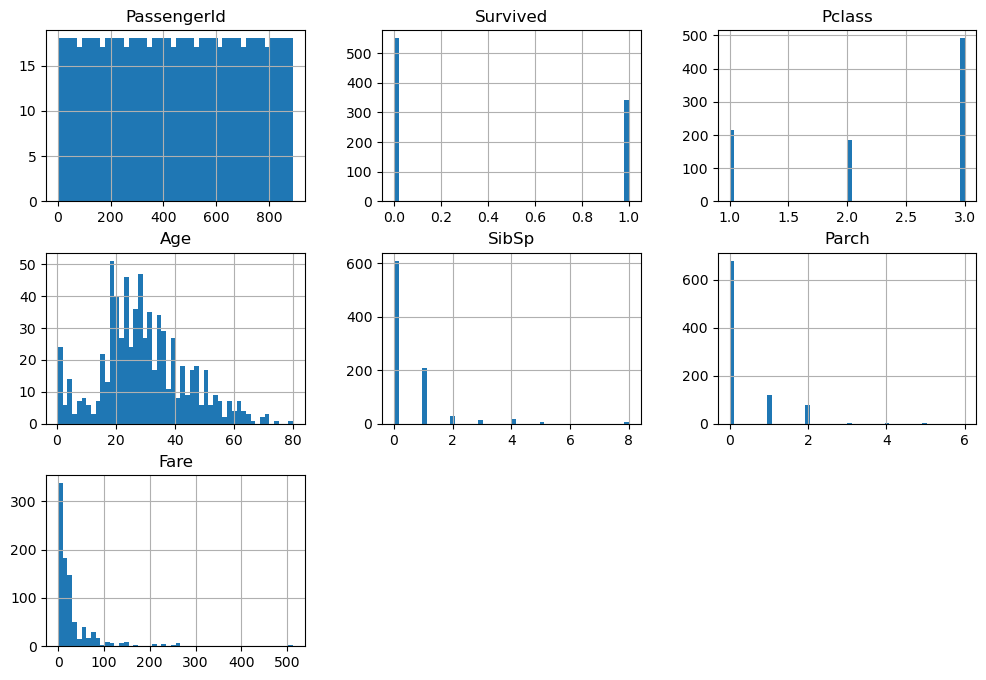

In [35]:
import matplotlib.pyplot as plt

train_data.hist(bins=50, figsize=(12,8))
plt.show()

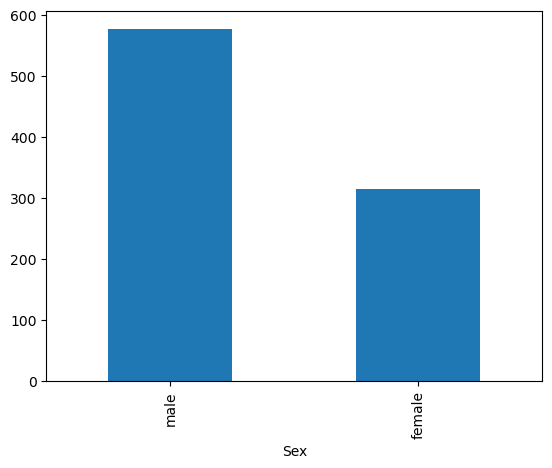

In [36]:
train_data["Sex"].value_counts().plot(kind="bar")
plt.show()

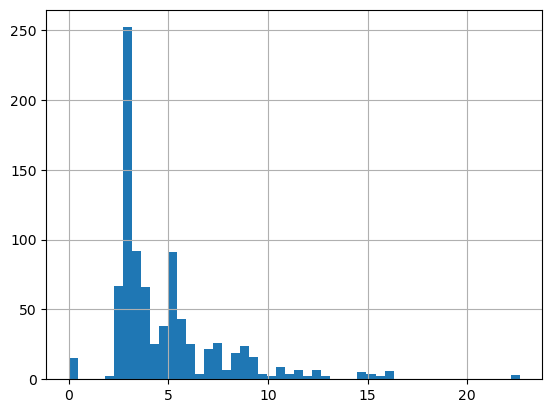

In [37]:
# np.log(train_data["Fare"])

np.sqrt(train_data["Fare"]).hist(bins=50)

plt.show()

In [41]:
# 特征列: Pclass，Sex，Age，SibSp,Parch,Fare,Embarked
# 标签列：Survived
feature_columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
label_column = "Survived"

titanic_features, titanic_label = train_data.drop(label_column, axis="columns"), train_data[label_column]

In [42]:
# 搭建预处理流水线
# Pclass, Sex, Embarked: frequent填充缺失值 + OneHotEncoder
# Age： median填充缺失值  + 标准化
# Fare： median填充缺失值 + np.sqrt + 标准化
# 其他 （SibSp, Parch):  frequent填充缺失值

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_pipeline = make_pipeline(OrdinalEncoder(), SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))
age_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
fare_pipeline = make_pipeline(SimpleImputer(strategy="median"), FunctionTransformer(np.sqrt, inverse_func=np.square, feature_names_out="one-to-one"), StandardScaler())
other_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"))

titanic_preprocess = ColumnTransformer(
    [
    ("cat", cat_pipeline, ["Pclass", "Sex", "Embarked"]),
     ("age", age_pipeline, ["Age"]),
     ("fare", fare_pipeline, ["Fare"]),
    ("other", other_pipeline, ["SibSp", "Parch"])
    ]
)

In [43]:
# 模型评估： RandomForest
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

random_forest_pipeline = Pipeline(
    [("preprocess", titanic_preprocess),
     ("forest", RandomForestClassifier(random_state=100, max_features=12)),]
)

sgd_clf_pipeline = Pipeline(
    [("preprocess", titanic_preprocess),
     ("sgd_clf", SGDClassifier(random_state=100, loss="log_loss")),]
)

svc_pipeline = Pipeline(
    [("preprocess", titanic_preprocess),
     ("svc", SVC())]
)


In [44]:
# 模型评估：RandomForest
random_forest_search = GridSearchCV(random_forest_pipeline, param_grid={"forest__max_features": [6,12,18,24, "sqrt"], "preprocess__age__simpleimputer__strategy": ["median", "mean"]}, scoring="accuracy", cv=5)
random_forest_search.fit(titanic_features, titanic_label)
# cross_val_score(random_forest_pipeline, titanic_features, titanic_label, cv=3, scoring="f1")

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ordinalencoder',
                                                                                          OrdinalEncoder()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked']),
                                                                        ('age',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(s...
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Fare']),
                                                                        ('other',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['SibSp',
                                                                          'Parch'])])),
                                       ('forest',
                                        RandomForestClassifier(max_features=12,
                                                               random_state=100))]),
             param_grid={'forest__max_features': [6, 12, 18, 24, 'sqrt'],
                         'preprocess__age__simpleimputer__strategy': ['median',
                                                                      'mean']},
             scoring='accuracy')

In [45]:
pd.DataFrame(random_forest_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest__max_features,param_preprocess__age__simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.288936,0.006040,0.015429,0.000617,12,mean,"{'forest__max_features': 12, 'preprocess__age_...",0.787709,0.820225,0.865169,0.775281,0.837079,0.817092,0.032656,1
5,0.290356,0.005426,0.014430,0.000240,18,mean,"{'forest__max_features': 18, 'preprocess__age_...",0.787709,0.820225,0.865169,0.775281,0.837079,0.817092,0.032656,1
7,0.289376,0.012379,0.016206,0.001318,24,mean,"{'forest__max_features': 24, 'preprocess__age_...",0.787709,0.820225,0.865169,0.775281,0.837079,0.817092,0.032656,1
1,0.222266,0.006323,0.014595,0.000597,6,mean,"{'forest__max_features': 6, 'preprocess__age__...",0.787709,0.808989,0.859551,0.764045,0.853933,0.814845,0.037088,4
0,0.284609,0.107169,0.014509,0.001255,6,median,"{'forest__max_features': 6, 'preprocess__age__...",0.776536,0.814607,0.859551,0.780899,0.837079,0.813734,0.031958,5
2,0.289279,0.004933,0.014457,0.001011,12,median,"{'forest__max_features': 12, 'preprocess__age_...",0.787709,0.803371,0.848315,0.780899,0.842697,0.812598,0.027896,6
4,0.286277,0.004607,0.014935,0.000381,18,median,"{'forest__max_features': 18, 'preprocess__age_...",0.787709,0.803371,0.848315,0.780899,0.842697,0.812598,0.027896,6
6,0.288871,0.006728,0.014321,0.001101,24,median,"{'forest__max_features': 24, 'preprocess__age_...",0.787709,0.803371,0.848315,0.780899,0.842697,0.812598,0.027896,6
8,0.201037,0.007996,0.014992,0.001259,sqrt,median,"{'forest__max_features': 'sqrt', 'preprocess__...",0.776536,0.797753,0.859551,0.780899,0.831461,0.809240,0.031716,9
9,0.206161,0.004246,0.015216,0.000805,sqrt,mean,"{'forest__max_features': 'sqrt', 'preprocess__...",0.776536,0.803371,0.842697,0.775281,0.848315,0.809240,0.031316,9


In [46]:
# 评估SGDClassifier
sgd_clf_search = GridSearchCV(sgd_clf_pipeline, param_grid={"preprocess__age__simpleimputer__strategy": ["median", "mean"], "sgd_clf__loss": ["log_loss", "hinge"]}, scoring="accuracy", cv=5)
sgd_clf_search.fit(titanic_features, titanic_label)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ordinalencoder',
                                                                                          OrdinalEncoder()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked']),
                                                                        ('age',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(s...
                                                                                                              inverse_func=<ufunc 'square'>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Fare']),
                                                                        ('other',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['SibSp',
                                                                          'Parch'])])),
                                       ('sgd_clf',
                                        SGDClassifier(loss='log_loss',
                                                      random_state=100))]),
             param_grid={'preprocess__age__simpleimputer__strategy': ['median',
                                                                      'mean'],
                         'sgd_clf__loss': ['log_loss', 'hinge']},
             scoring='accuracy')

In [47]:
pd.DataFrame(sgd_clf_search.cv_results_).sort_values(by="mean_test_score", ascending=False)
# cross_val_score(sgd_clf_pipeline, titanic_features, titanic_label, cv=3, scoring="f1")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocess__age__simpleimputer__strategy,param_sgd_clf__loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.023766,0.002839,0.007707,0.000920,mean,log_loss,{'preprocess__age__simpleimputer__strategy': '...,0.776536,0.780899,0.741573,0.775281,0.747191,0.764296,0.016462,1
0,0.075248,0.102501,0.008209,0.002016,median,log_loss,{'preprocess__age__simpleimputer__strategy': '...,0.782123,0.780899,0.735955,0.775281,0.747191,0.764290,0.019026,2
3,0.021620,0.001725,0.007747,0.000375,mean,hinge,{'preprocess__age__simpleimputer__strategy': '...,0.692737,0.775281,0.730337,0.769663,0.825843,0.758772,0.044853,3
1,0.022651,0.003096,0.007116,0.001230,median,hinge,{'preprocess__age__simpleimputer__strategy': '...,0.720670,0.786517,0.713483,0.747191,0.786517,0.750876,0.031192,4


In [48]:
cross_val_score(svc_pipeline, titanic_features, titanic_label, cv=5, scoring="accuracy")

array([0.82681564, 0.81460674, 0.81460674, 0.80898876, 0.85393258])

In [49]:
# 拟合SVC
svc_pipeline.fit(titanic_features, titanic_label)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('age',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standar...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'sqrt'>,
                                                                                       inverse_func=<ufunc 'square'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('other',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['SibSp', 'Parch'])])),
                ('svc', SVC())])

In [50]:
# 做出预测
# best__model = random_forest_search.best_estimator_
best_model = svc_pipeline

output_frame = test_data[["PassengerId"]].copy()
output_frame["Survived"] = best_model.predict(test_data)

In [51]:
output_frame

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
output_frame.to_csv("./titanic_pred.csv", index=False)


In [54]:
titanic_pred = pd.read_csv("./titanic_pred.csv", usecols=["Survived"])
titanic_label = pd.read_csv("./data/test_augmented.csv", usecols=["Survived"])

titanic_label

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(titanic_label, titanic_pred)

0.7799043062200957

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0
